<a href="https://colab.research.google.com/github/Mevaourse/Classification-Obese-Using-XGBOOST/blob/main/capstone_daniel_nomolas_w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Klasifikasi Obesitas
----
Nama : Daniel Nomolas Wicaksono

NIM : A11.2022.14448

#Pendahuluan

Notebook ini berisikan proses pembuatan model klasifikasi obesitas dari proses awal yaitu pemahaman data (EDA), Preprocessing dan pemodelan. Dataset yang dipakai adalah ObesityDataSet.csv yang memiliki fitur seperti umur, alat kelamin, tinggi dan berat badan. Model yang digunakan adalah Random Forest,Gradient Boosting dan XGB.

#1. Import Library



In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#2. Memuat dataset dan inspeksi dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ObesityDataSet.csv')

#Kita buat 2dataset, cleaned adalah dataset yang tidak diapa2kan sementara df biasa adalah dataset yang akan kita proses nantinya
df_cleaned = df.copy()
df.head()


Mounted at /content/drive


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# 3. EDA pada dataset "ObesityDataSet"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Berdasarkan informasi,disimpulkan =
1. bahwa dataset ini memiliki 17 kolom yang bertipekan object semua dan memiliki 2111 baris.
2. Adanya missing value
3. Kemungkinan menggunakan (,) yang harus diganti menjadi (.)

In [4]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


# 4. Penaganan data yang hilang

Cek unique value berfungsi untuk mengetahui unique value pada setiap kolom yang ada di dataset

In [5]:
for col in df.columns:
    print(f"Kolom {col} punya {df[col].nunique()} unique value:")
    print(df[col].unique())
    print()


Kolom Age punya 1394 unique value:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']

Kolom Gender punya 3 unique value:
['Female' 'Male' '?' nan]

Kolom Height punya 1562 unique value:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']

Kolom Weight punya 1518 unique value:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']

Kolom CALC punya 5 unique value:
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]

Kolom FAVC punya 3 unique value:
['no' 'yes' '?' nan]

Kolom FCVC punya 808 unique value:
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979' '2.450218'
 '2.880161' '2.00876' '2.596579' '2.591439' '2.392665' '1.123939'
 '2.027574' '2.658112' '2.88626' '2.714447' '2.750715' '1.4925' '2.205439'
 '2.059138' '2.310423' '2.823179' '2.052932' '2.596364' '2.767731'
 '2.815157' '2.737762' '2.524428' '2.971574' '1.0816' '1.270448'
 '1.344854' '2.959658' '2.725282' '2.844607' '2.44004' '2.432302'
 '2.592247' '2.449267' '2.929889' '2.015258' '1.031149' '1.592183'

Pada beberapa kolom seperti Age, Gender,Height dan Weight  terlihat keberadaan nilai NaN dan karakter '?', yang keduanya dikategorikan sebagai missing value dalam analisis ini.


Pengecekan adanya missing value berupa nan dan "?"

In [6]:
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [7]:
print((df =='?').sum())

Age                                8
Gender                            13
Height                            10
Weight                             8
CALC                              15
FAVC                              11
FCVC                              10
NCP                               10
SCC                                8
SMOKE                              8
CH2O                               9
family_history_with_overweight    10
FAF                               11
TUE                                6
CAEC                               7
MTRANS                             6
NObeyesdad                         0
dtype: int64


Teridentifikasi adanya missing value berupa nilai NaN dan karakter '?'. Selanjutnya, akan dilakukan penanganan terhadap nilai-nilai hilang tersebut untuk memastikan kualitas data sebelum proses analisis lebih lanjut.

Rubah dataset "?" menjadi nan

In [8]:
df.replace("?", pd.NA, inplace=True)

In [9]:
print((df =='?').sum())

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Terlihat tidak ada data berupa "?", dikarenakan sudah dirubah menjadi nan

In [10]:
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


Jumlah nilai yang hilang per kolom:
family_history_with_overweight    23
Age                               22
Height                            22
Gender                            22
NCP                               22
FAVC                              22
CALC                              20
Weight                            19
FAF                               19
FCVC                              18
CAEC                              18
SCC                               18
TUE                               15
CH2O                              15
SMOKE                             13
MTRANS                            12
dtype: int64


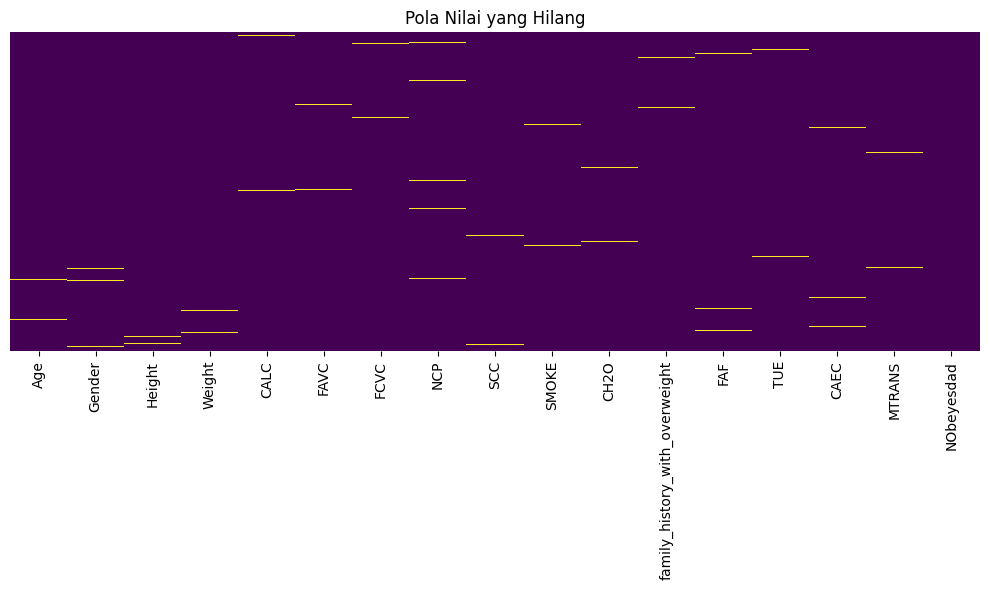


Ukuran dataset setelah menghapus nilai yang hilang: 1811 baris x 17 kolom
Jumlah baris yang dihapus: 300


In [11]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    print("Jumlah nilai yang hilang per kolom:")
    print(missing)

    # Visualisasi nilai yang hilang
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Pola Nilai yang Hilang')
    plt.tight_layout()
    plt.show()

    # Menghapus baris dengan nilai yang hilang
    df_clean = df.dropna()
    print(f"\nUkuran dataset setelah menghapus nilai yang hilang: {df_clean.shape[0]} baris x {df_clean.shape[1]} kolom")
    print(f"Jumlah baris yang dihapus: {df.shape[0] - df_clean.shape[0]}")

    # Menggunakan dataset yang sudah dibersihkan
    df = df_clean
else:
    print("Tidak ada nilai yang hilang dalam dataset.")

Karena jumlah missing value relatif sedikit, penanganan dilakukan dengan metode imputasi. Untuk data bertipe kategorikal, missing value diisi menggunakan nilai modus dari kolom terkait, sedangkan untuk data numerik digunakan nilai rata-rata (mean).

#Import SimpleImputer

SimpleImputer adalah library yang digunakan untuk mengisi missing value data menggunakan metode Modus dan Mean

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

# Buat imputer dengan strategi "most_frequent" (modus)
imputer = SimpleImputer(strategy="most_frequent")

# Daftar kolom kategori yang akan diisi
cat_cols = ['Gender','CALC','FAVC','SCC','SMOKE','family_history_with_overweight','CAEC','MTRANS']

# Convert pd.NA to np.nan before applying imputation
df[cat_cols] = df[cat_cols].fillna(np.nan)
# Terapkan imputasi pada setiap kolom
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [13]:

# Buat imputer dengan strategi "mean" rata rata
imputer = SimpleImputer(strategy="mean")

# Daftar kolom kategori yang akan diisi
num_cols = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]

# Convert pd.NA to np.nan before applying imputation
df[num_cols] = df[num_cols].fillna(np.nan)
# Terapkan imputasi pada setiap kolom
df[num_cols] = imputer.fit_transform(df[num_cols])

In [14]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [15]:
df.info()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1811 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1811 non-null   float64
 1   Gender                          1811 non-null   object 
 2   Height                          1811 non-null   float64
 3   Weight                          1811 non-null   float64
 4   CALC                            1811 non-null   object 
 5   FAVC                            1811 non-null   object 
 6   FCVC                            1811 non-null   float64
 7   NCP                             1811 non-null   float64
 8   SCC                             1811 non-null   object 
 9   SMOKE                           1811 non-null   object 
 10  CH2O                            1811 non-null   float64
 11  family_history_with_overweight  1811 non-null   object 
 12  FAF                             1811 no

Setelah dilakukan penanganan terhadap missing value, terlihat bahwa beberapa kolom mengalami perubahan tipe data, dari tipe object menjadi float atau dari kategorikal menjadi numerik. Perubahan ini terjadi pada kolom seperti Height, Weight, SMOKE, dan beberapa kolom lainnya.

#5. Cek dan penanganan duplicate

Tahap selanjutnya adalah melakukan pemeriksaan terhadap data duplikat dan melakukan penanganan apabila ditemukan duplikasi."

In [16]:
df.duplicated().sum()



np.int64(18)

Setelah dilakukan konfirmasi, terdapat data duplicate sebanyak 19 baris, data duplikasi diatasi dengan cara drop baris duplikasi

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

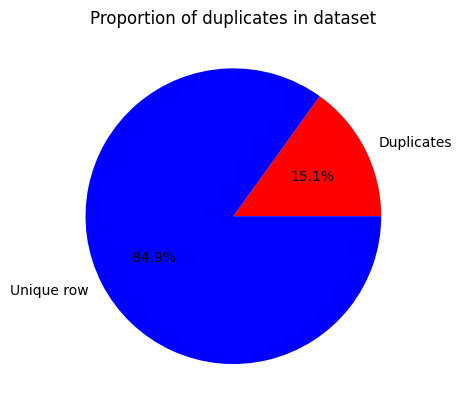

In [18]:
duplicates = len(df_cleaned) - len(df)
unique = len(df)

plt.pie([duplicates, unique],
        labels=['Duplicates','Unique row'],
        autopct='%1.1f%%',
        colors=['red','blue'])
plt.title('Proportion of duplicates in dataset')
plt.show()

Berikutnya mengecek Outliers pada dataset

In [19]:
#mengelompokkan berdasarkan tipe data
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("\n [INFO] Mendeteteksi Outliers")
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"outliers ditemukan di kolom '{col} ':")
        print(outliers)

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    df[col] = np.where(df[col]< lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col]> upper_bound, upper_bound, df[col])


 [INFO] Mendeteteksi Outliers
outliers ditemukan di kolom 'Age ':
             Age  Gender    Height      Weight        CALC FAVC      FCVC  \
13     41.000000    Male  1.800000   99.000000  Frequently  yes  2.000000   
21     52.000000  Female  1.690000   87.000000          no  yes  3.000000   
23     87.772283  Female  1.600000   82.000000   Sometimes  yes  1.000000   
92     55.000000    Male  1.780000   84.000000  Frequently   no  3.000000   
104    38.000000  Female  1.560000   80.000000   Sometimes  yes  2.000000   
...          ...     ...       ...         ...         ...  ...       ...   
1740   37.765356    Male  1.763582  117.861590   Sometimes  yes  2.145114   
1776   38.108940    Male  1.752863  119.201465   Sometimes  yes  2.499388   
1777   38.644441    Male  1.768235  117.792268   Sometimes  yes  2.230742   
1819   95.660147  Female  1.654875  104.758713   Sometimes  yes  3.000000   
1889  100.867368  Female  1.628909  106.875927   Sometimes  yes  3.000000   

        

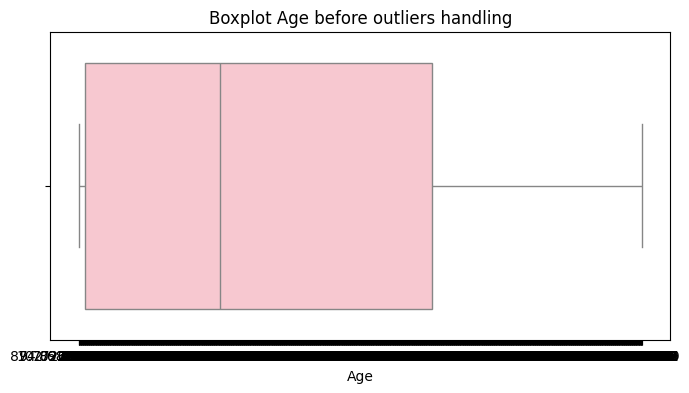

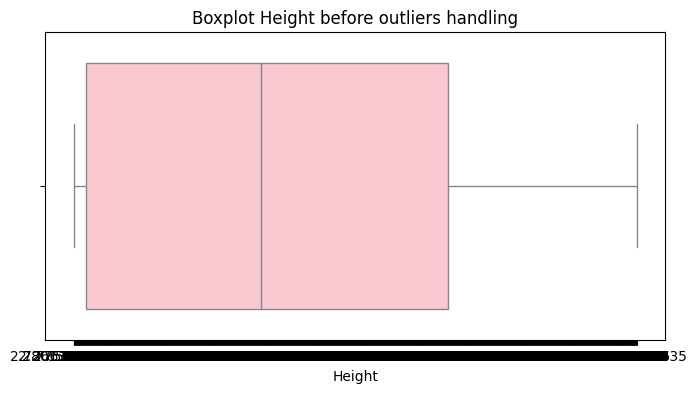

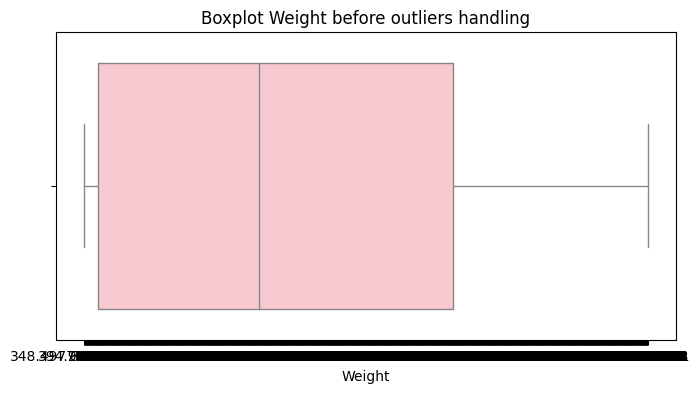

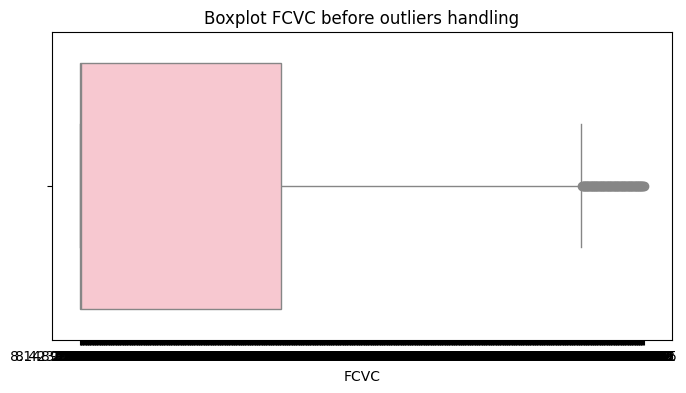

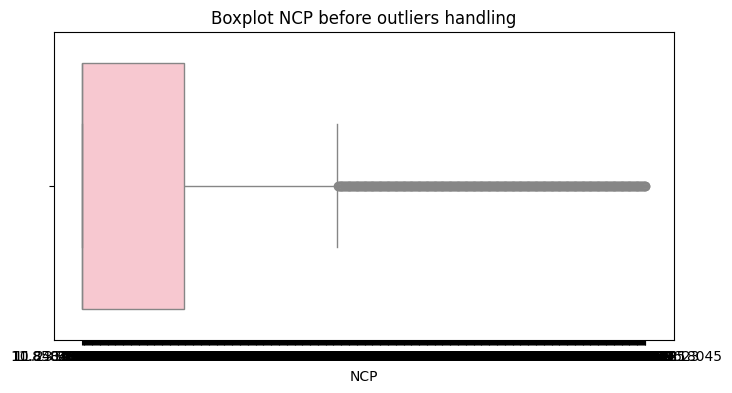

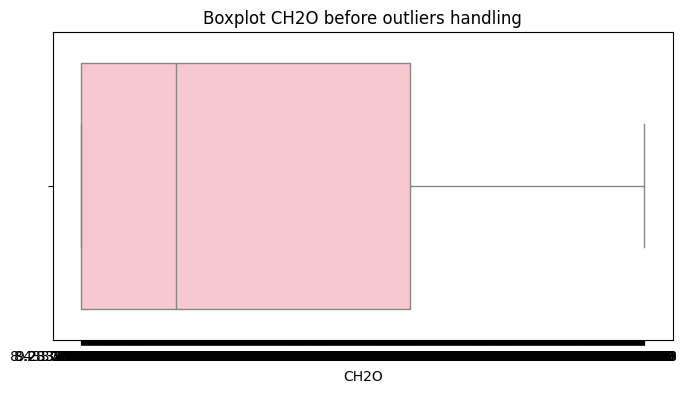

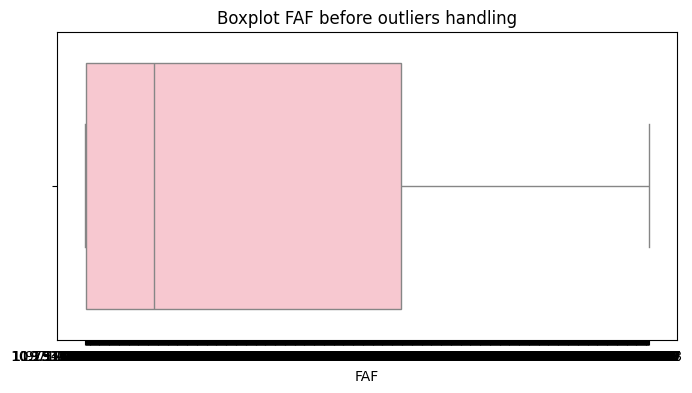

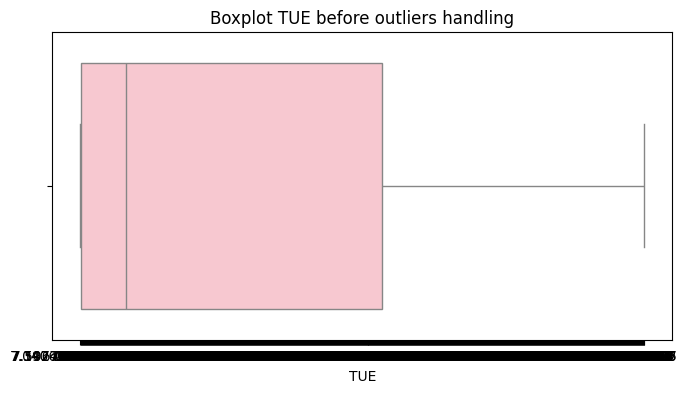

In [20]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_cleaned[col], color='pink')
    plt.title(f'Boxplot {col} before outliers handling')
    plt.show()

Terlihat terdapat outliers pada kolom FCVC dan NCP, outliers tersebut diatasi dengan cara pemangkasan Metode IQR dengan batas atas dan bawah di 1.5

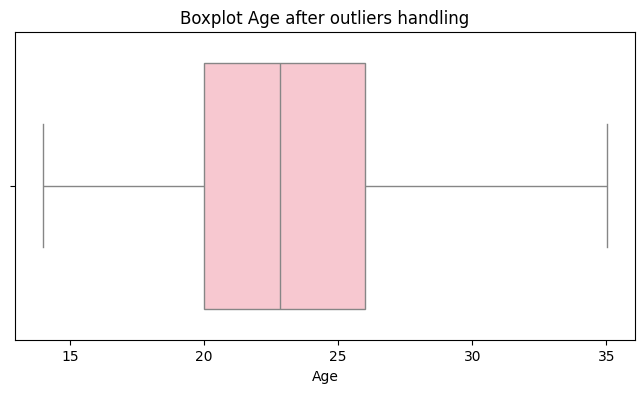

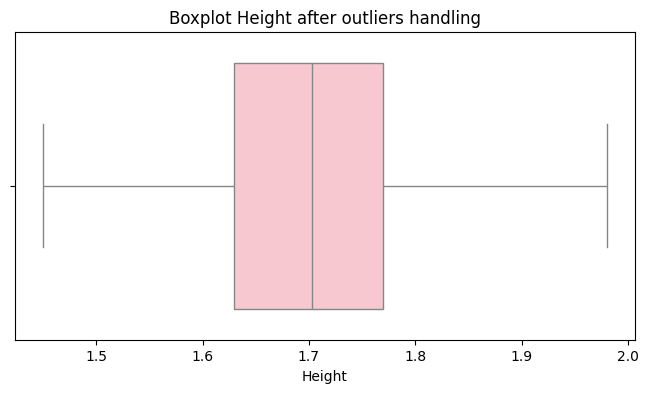

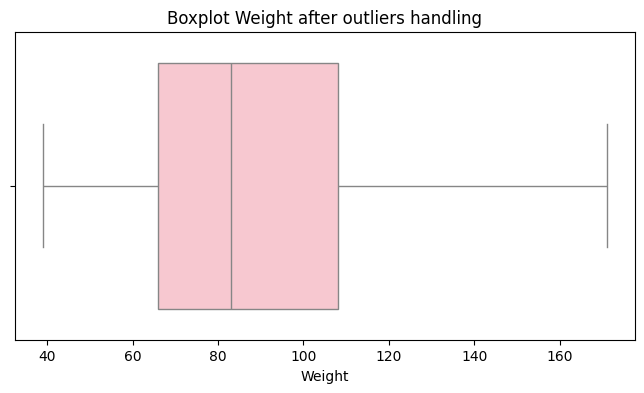

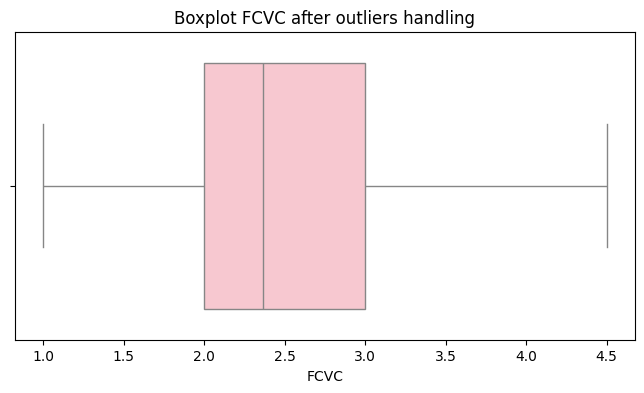

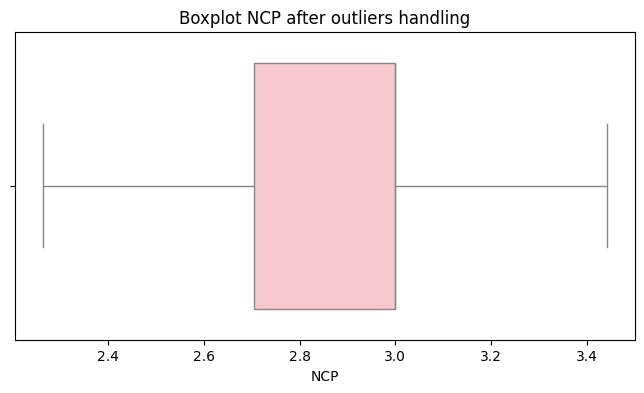

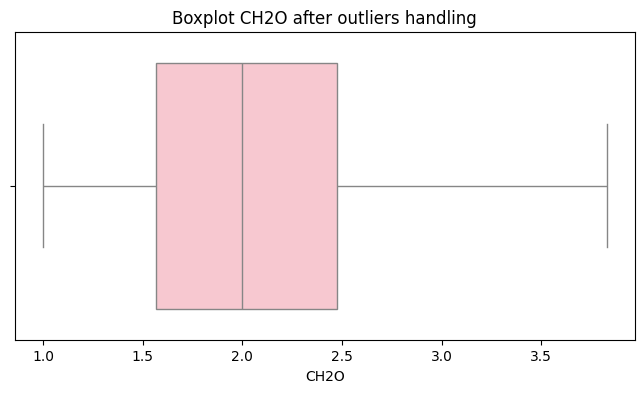

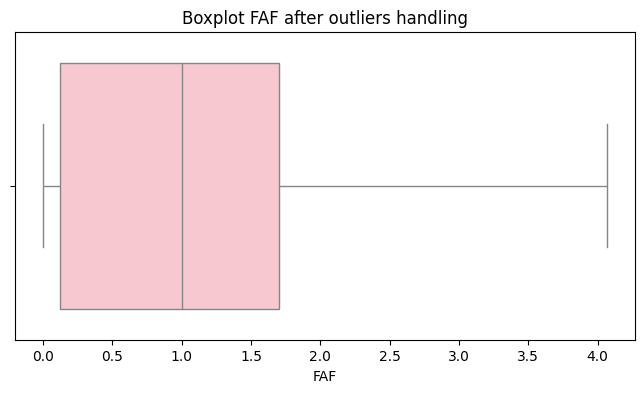

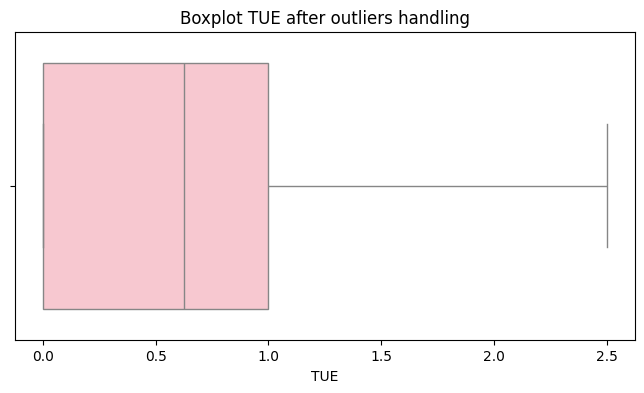

In [21]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], color='pink')
    plt.title(f'Boxplot {col} after outliers handling')
    plt.show()

Terlihat sudah tidak ada outliers lagi pada dataset Numerik

Selanujutnya kita melakukan Label Encoder pada kolom kategorikal menggunakan libary LabelEncoder, Label encoder ini dilakukan untuk merubah kolom Kategorikal menjadi Kategorikal numerik, supaya nantinya mdoel dapat melakukan training pada dataset.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
#encode target variabel
df['NObeyesdad']= LabelEncoder().fit_transform(df['NObeyesdad'])



In [24]:
cat_cols = ['Gender','CALC','FAVC','SCC','SMOKE',
            'family_history_with_overweight','CAEC','MTRANS']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [25]:
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,SCC_yes,SMOKE_yes,family_history_with_overweight_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.000000,2.0,0.0,1.0,1,False,...,False,False,True,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.000000,3.0,3.0,0.0,1,False,...,True,True,True,False,True,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.000000,2.0,2.0,1.0,1,True,...,False,False,True,False,True,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.000000,2.0,2.0,0.0,5,True,...,False,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,2.0,2.263613,2.0,0.0,0.0,6,True,...,False,False,False,False,True,False,False,False,True,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1793 non-null   float64
 1   Height                              1793 non-null   float64
 2   Weight                              1793 non-null   float64
 3   FCVC                                1793 non-null   float64
 4   NCP                                 1793 non-null   float64
 5   CH2O                                1793 non-null   float64
 6   FAF                                 1793 non-null   float64
 7   TUE                                 1793 non-null   float64
 8   NObeyesdad                          1793 non-null   int64  
 9   Gender_Male                         1793 non-null   bool   
 10  CALC_Frequently                     1793 non-null   bool   
 11  CALC_Sometimes                      1793 non-nul

Terlihat bahwa semua kolom berubah menjadi numerik

In [27]:
for col in df.columns:
    print(f"Kolom {col} punya {df[col].nunique()} unique value:")
    print(df[col].unique())
    print()


Kolom Age punya 1076 unique value:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]

Kolom Height punya 1352 unique value:
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Kolom Weight punya 1307 unique value:
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

Kolom FCVC punya 695 unique value:
[2.       3.       1.       4.5      2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.059138 2.596364 2.767731 2.815157 2.737762 2.524428 2.971574 1.0816
 1.270448 2.959658 2.725282 2.44004  2.432302 2.592247 2.449267 2.929889
 2.015258 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.204914 2.927218
 2.88853  2.890535 2.241606 1.003566 2.652779 2.897899 2.483979 2.478891
 1.005578 2.938031 2.842102 1.889199 1.950742 2.277436 2.371338 2.984425
 2.977018 2.663421 2.753752 2.318355 2.886157 2.967853 2.619835 2.530233
 

Berikutnya kita akan mengecek imbalance untuk setiap kelas kategorikal

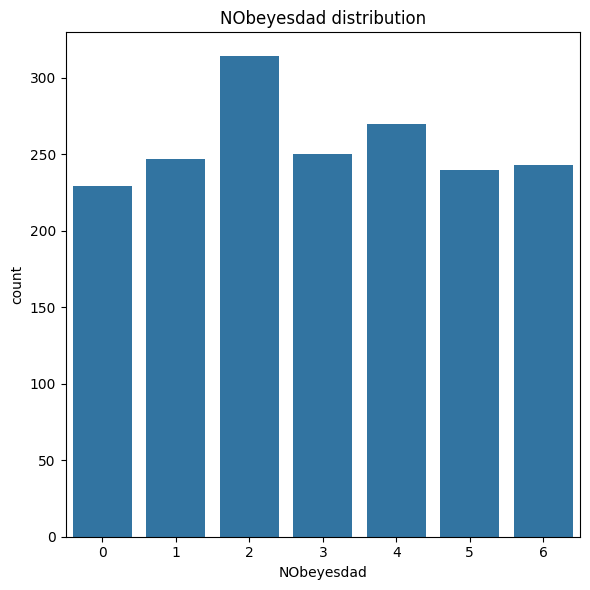

In [28]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='NObeyesdad')
plt.title('NObeyesdad distribution')
plt.tight_layout()
plt.show()


Pada kelas target terlihat ada beberapa kelas yang tidak balance, sehingga perlu dilakukan balancing. Metode yang digunakan untuk balancing adalah SMOTE

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 2110
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1793 non-null   float64
 1   Height                              1793 non-null   float64
 2   Weight                              1793 non-null   float64
 3   FCVC                                1793 non-null   float64
 4   NCP                                 1793 non-null   float64
 5   CH2O                                1793 non-null   float64
 6   FAF                                 1793 non-null   float64
 7   TUE                                 1793 non-null   float64
 8   NObeyesdad                          1793 non-null   int64  
 9   Gender_Male                         1793 non-null   bool   
 10  CALC_Frequently                     1793 non-null   bool   
 11  CALC_Sometimes                      1793 non-nul

Sebelum mengatasi Imbalance pada kelas kategorikal, kita akan melakukan split dataset menjadi 80% training dan 20 % test. Dan pengatasan imbalance dilakukan pada dataset training saja.

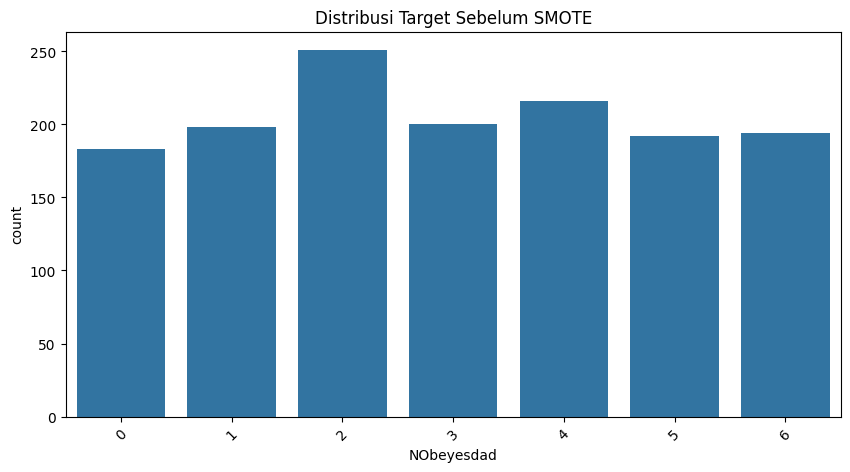

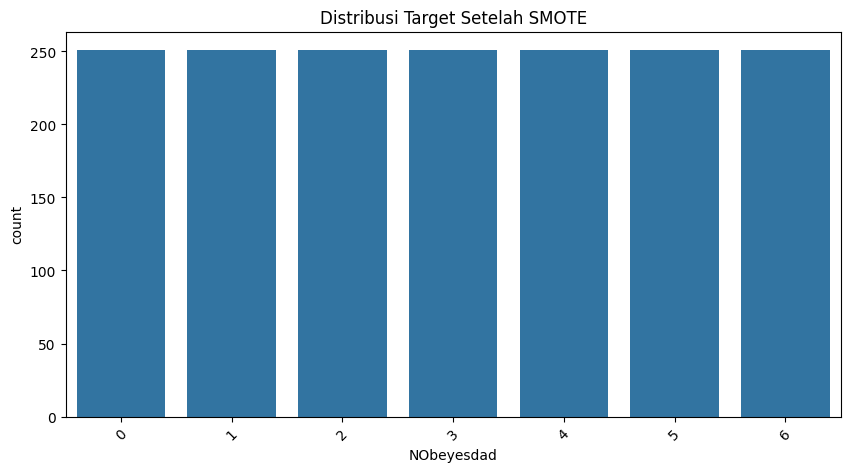

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Pisahkan fitur dan target
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']

# Split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#normalisasi
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

# Visualisasi distribusi sebelum SMOTE
plt.figure(figsize=(10,5))
sns.countplot(x=y_train)
plt.title("Distribusi Target Sebelum SMOTE")
plt.xticks(rotation=45)
plt.show()

# Terapkan SMOTE hanya ke data training
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Visualisasi distribusi setelah SMOTE
plt.figure(figsize=(10,5))
sns.countplot(x=y_train_resampled)
plt.title("Distribusi Target Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()


Setelah melakukan balancing pada kolom target, berikutnya kita mulai permodelan, model yang dipilih adalah XGB, GradientBoosting dan Random Forest.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from xgboost import XGBClassifier


# Inisialisasi model
rf_def = RandomForestClassifier(random_state=42)
gb_def = GradientBoostingClassifier(random_state=42)
xgb_def = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)


# Melatih dan mengevaluasi tiap model sebelum tuning

rf_def.fit(X_train_resampled, y_train_resampled)
gb_def.fit(X_train_resampled, y_train_resampled)
xgb_def.fit(X_train_resampled, y_train_resampled)



# Tampilkan hasil evaluasi sebelum tuning
print("=== Random Forest Default ===")
print(classification_report(y_test, rf_def.predict(X_test)))


print("=== Gradient Boosting Default ===")
print(classification_report(y_test, gb_def.predict(X_test)))

print("=== XGBoost Default ===")
print(classification_report(y_test, xgb_def.predict(X_test)))




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:12:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Random Forest Default ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.80      0.90      0.85        49
           2       0.98      0.89      0.93        63
           3       0.96      1.00      0.98        50
           4       0.98      1.00      0.99        54
           5       0.87      0.85      0.86        48
           6       0.86      0.86      0.86        49

    accuracy                           0.92       359
   macro avg       0.92      0.92      0.91       359
weighted avg       0.92      0.92      0.92       359

=== Gradient Boosting Default ===
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.84      0.86      0.85        49
           2       0.98      0.95      0.97        63
           3       0.98      1.00      0.99        50
           4       0.98      1.00      0.99        54
           5  

Berdasarkan hasil evaluasi performa model menggunakan metrik Accuracy, Precision, Recall, dan F1-Score, model XGBoost (xgb) menunjukkan kinerja terbaik di antara ketiga model yang diuji. Model XGBoost mencatatkan nilai tertinggi secara konsisten di semua metrik, dengan Accuracy sebesar 94,71%, Precision 94,73%, Recall 94,71%, dan F1-Score 94,71%.

Sementara itu, Random Forest menempati posisi kedua dengan performa yang juga baik, namun sedikit di bawah XGBoost, dan Gradient Boosting berada di posisi terakhir dengan nilai metrik yang paling rendah di antara ketiganya.

Dengan demikian, XGBoost merupakan model yang paling optimal untuk digunakan dalam kasus ini karena memberikan hasil klasifikasi yang paling akurat dan seimbang di semua aspek evaluasi.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 1.0]
}

In [33]:
#GRID SEARCH UNTUK MODEL

gs_rf = GridSearchCV(RandomForestClassifier(random_state=42),rf_params,cv=5, n_jobs=-1, scoring='f1_weighted' )

gs_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),xgb_params,cv=5, n_jobs=-1, scoring='f1_weighted' )

gs_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),gb_params,cv=5, n_jobs=-1, scoring='f1_weighted' )




In [ ]:
#Melatih model yang sudah di Hyperparameter tuning
gs_rf.fit(X_train_resampled, y_train_resampled)
gs_xgb.fit(X_train_resampled, y_train_resampled)
gs_gb.fit(X_train_resampled, y_train_resampled)


#Mendapatkan model terbaik

rf_best = gs_rf.best_estimator_
xgb_best = gs_xgb.best_estimator_
gb_best = gs_gb.best_estimator_

In [ ]:
print("=== XGBoost Tuned ===")
print(classification_report(y_test, xgb_best.predict(X_test)))

print("=== Random Forest Tuned ===")
print(classification_report(y_test, rf_best.predict(X_test)))

print("=== Gradient boosting Tuned ===")
print(classification_report(y_test, gb_best.predict(X_test)))



In [ ]:
models = [
    ('Random Forest Default', rf_def),
    ('Gradient Boosting Default', gb_def),
    ('XGBoost Default', xgb_def),
    ('Random Forest Tuned', rf_best),
    ('Gradient Boosting Tuned', gb_best),
    ('XGBoost Tuned', xgb_best)
]

In [ ]:
# prompt: buat visualisasi perbandingan antara semua model sebelum dan sesudah tuning, dan beri confusion  matrixnya menggunakan matrix models


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# Buat dataframe untuk menyimpan hasil metrik
results = []
for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

results_df = pd.DataFrame(results)

# Visualisasi perbandingan metrik
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Perbandingan Metrik Model Sebelum dan Sesudah Tuning')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualisasi Confusion Matrix untuk setiap model
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [ ]:
accuracy_def = {
    'RF': accuracy_score(y_test, rf_def.predict(X_test)),
    'GB': accuracy_score(y_test, gb_def.predict(X_test)),
    'XGB': accuracy_score(y_test, xgb_def.predict(X_test))
}


accuracy_tuned = {
    'RF': accuracy_score(y_test, rf_best.predict(X_test)),
    'GB': accuracy_score(y_test, gb_best.predict(X_test)),
    'XGB': accuracy_score(y_test, xgb_best.predict(X_test))
}

# Membuat tabel perbandingan akurasi model
comparison_df = pd.DataFrame({
    'Model': ['RF Default', 'GB Default', 'XGB Default', 'RF Tuned', 'GB Tuned', 'XGB Tuned'],
    'Akurasi': [
        accuracy_def['RF'],
        accuracy_def['GB'],
        accuracy_def['XGB'],
        accuracy_tuned['RF'],
        accuracy_tuned['GB'],
        accuracy_tuned['XGB'],
    ]
})

# Tampilkan tabel perbandingan
comparison_df

#Kesimpulan evaluasi model

Kesimpulan Evaluasi Model (Default vs Tuned):
XGBoost Default menunjukkan performa terbaik di antara semua model default:

Accuracy tertinggi: 0.95

Macro avg dan weighted avg f1-score juga tertinggi (0.95)

Performa sangat baik dan konsisten di hampir semua kelas.

XGBoost Tuned berhasil mempertahankan performa tinggi:

Accuracy tetap 0.95, sama dengan versi default.

Namun, stabilitas meningkat di beberapa kelas, seperti kelas 5 dan 6 (precision & recall naik menjadi 0.90+).

Macro avg dan weighted avg tetap di angka 0.95, menandakan keseimbangan prediksi antar kelas tetap optimal.

Random Forest Default vs Tuned:

Tuning tidak memberikan peningkatan signifikan, karena nilai accuracy dan metrik lainnya tetap di angka 0.94.

Komposisi precision dan recall antar kelas juga hampir identik.

Artinya, model ini sudah cukup optimal dengan parameter default-nya.

Gradient Boosting Default vs Tuned:

Accuracy naik dari 0.93 menjadi 0.94 setelah tuning.

Peningkatan terlihat pada kelas 1, 5, dan 6, terutama dalam metrik recall dan f1-score.

Ini menunjukkan bahwa tuning memberikan dampak positif, meskipun tidak signifikan dibanding XGBoost.

#Kesimpulan akhir
---


XGBoost adalah model terbaik secara keseluruhan, baik sebelum maupun sesudah tuning, dengan akurat, seimbang, dan konsisten di semua kelas.

Tuning hyperparameter paling berdampak positif pada Gradient Boosting, meskipun peningkatannya tidak mengungguli XGBoost.

Random Forest menunjukkan stabilitas tinggi dan performa cukup baik tanpa banyak pengaruh dari tuning, tapi masih sedikit di bawah XGBoost.

Maka, XGBoost Tuned direkomendasikan sebagai model utama yang paling optimal untuk digunakan pada kasus klasifikasi ini.



In [ ]:
import os

os.makedirs('models', exist_ok=True)

In [ ]:
import joblib

#export scaler
joblib.dump(scaler, 'models/scaler.pkl')

#export model xgb, karena xgb merupakan model terbaik berdasarkan data
joblib.dump(xgb_best, 'models/xgb_best.pkl')
joblib.dump(rf_best, 'models/rf_best.pkl')
joblib.dump(gb_best, 'models/gb_best.pkl')
joblib.dump(rf_def, 'models/rf_def.pkl')
joblib.dump(gb_def, 'models/gb_def.pkl')
joblib.dump(xgb_def, 'models/xgb_def.pkl')

# Menyimpan daftar kolom dalam urutan yang sesuai dengan yang diharapkan model
feature_columns = X_train_resampled.columns.tolist()
joblib.dump(feature_columns, 'models/feature_columns.pkl')

# Menyimpan label encoder untuk mengkonversi prediksi numerik ke kategori asli
joblib.dump(LabelEncoder, 'models/label_encoder.pkl')

